In [1]:
!pip install keras-metrics
!pip install pandas

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense , Conv2D , MaxPool2D ,  Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from keras.preprocessing import image
from tensorflow.keras.models import Model
import PIL
import PIL.Image
from PIL import Image
import cv2
from numpy import asarray
import numpy
import pandas as pd

import keras_metrics
print(tf.__version__)

2.9.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
img_width = 64
img_height = 64

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.4)



In [6]:
train_data_generator = datagen.flow_from_directory(directory='C:/Users/TUSHAR/malaria/cell_images',
                          target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   
                                                   )            

Found 16536 images belonging to 2 classes.


In [7]:
validation_data_generator = datagen.flow_from_directory(directory='C:/Users/TUSHAR/malaria/cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   
                                                   )

Found 11022 images belonging to 2 classes.


Parasitized Cell :


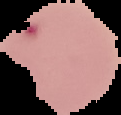

In [8]:
path1 = "C:/Users/TUSHAR/malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144823_cell_162.png"
Load_image1 = tf.keras.preprocessing.image.load_img(path1)
print("Parasitized Cell :")
Load_image1



Uninfected Cell :


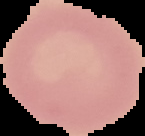

In [9]:
path2 = "C:/Users/TUSHAR/malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png"
print("Uninfected Cell :")
Load_image2 = tf.keras.preprocessing.image.load_img(path2)
Load_image2

In [10]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

# CNN model

In [11]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape = (img_width,img_height,3), activation = "relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy",tf.keras.metrics.AUC(),
          tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.FalseNegatives(),
          tf.keras.metrics.FalsePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives()])


In [13]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 15,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/15


C:\Users\TUSHAR\AppData\Local\Temp/ipykernel_27300/2835613124.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data_generator,


1034/1034 [==============================] - 40s 37ms/step - loss: 0.4390 - accuracy: 0.7779 - auc: 0.8760 - precision: 0.7699 - recall: 0.7928 - false_negatives: 1713.0000 - false_positives: 1959.0000 - true_negatives: 6309.0000 - true_positives: 6555.0000 - val_loss: 0.1727 - val_accuracy: 0.9317 - val_auc: 0.9818 - val_precision: 0.9407 - val_recall: 0.9214 - val_false_negatives: 433.0000 - val_false_positives: 320.0000 - val_true_negatives: 5191.0000 - val_true_positives: 5078.0000
Epoch 2/15
1034/1034 [==============================] - 39s 38ms/step - loss: 0.1974 - accuracy: 0.9399 - auc: 0.9721 - precision: 0.9256 - recall: 0.9568 - false_negatives: 357.0000 - false_positives: 636.0000 - true_negatives: 7632.0000 - true_positives: 7911.0000 - val_loss: 0.1586 - val_accuracy: 0.9517 - val_auc: 0.9844 - val_precision: 0.9368 - val_recall: 0.9688 - val_false_negatives: 172.0000 - val_false_positives: 360.0000 - val_true_negatives: 5151.0000 - val_true_positives: 5339.0000
Epoch 3/1

In [14]:
history.history

{'loss': [0.4390175938606262,
  0.1974140852689743,
  0.17159037292003632,
  0.16461020708084106,
  0.15394175052642822,
  0.15013670921325684,
  0.14298740029335022,
  0.14152681827545166,
  0.1376512348651886,
  0.13689208030700684,
  0.1335580199956894,
  0.130668506026268,
  0.12741747498512268,
  0.13003821671009064,
  0.12327338010072708],
 'accuracy': [0.7779390215873718,
  0.9399492144584656,
  0.9482341408729553,
  0.9495041370391846,
  0.9522254467010498,
  0.9536163806915283,
  0.9536768198013306,
  0.9554305672645569,
  0.9568215012550354,
  0.9553701281547546,
  0.9573657512664795,
  0.9582123756408691,
  0.9585752487182617,
  0.9585752487182617,
  0.9582123756408691],
 'auc': [0.8759564161300659,
  0.9720737338066101,
  0.9779087901115417,
  0.9803318381309509,
  0.9821068048477173,
  0.9826452136039734,
  0.9850547909736633,
  0.9849936962127686,
  0.9856513142585754,
  0.9861889481544495,
  0.9870500564575195,
  0.9869709610939026,
  0.9882058501243591,
  0.987566590309

Plotting Graphs and Outputs

In [15]:
def plot_learningCurve(history,epoch):
  #plot learning and validation accuracy values
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','Val'], loc = 'upper left')
  plt.show()

   #plot learning and validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.ylabel("loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','Val'], loc = 'upper left')
  plt.show()

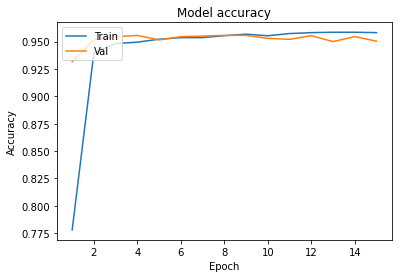

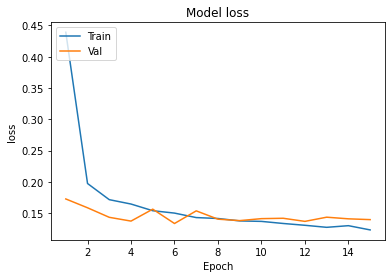

In [16]:
plot_learningCurve(history,15)

In [17]:
img_path=r"C:/Users/TUSHAR/malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64,64))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.


In [18]:
for j in range(0,1):
  activation_model = Model(inputs=model.inputs, outputs=model.layers[6].output)
  activation = activation_model(img_tensor)
  print(model.get_layer(index = 6).name)
  plt.figure(figsize=(20,20))
  print(activation)

conv2d_2
tf.Tensor(
[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.03533979 0.
    0.        ]
   [0.         0.         0.         ... 0.00194355 0.
    0.        ]
   ...
   [0.         0.         0.00507823 ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.03978471 ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.01453546 ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.03652655 0.         0.02224152 ... 0.         0.
    0.        ]
   [0.         0.         0.03690225 ..

<Figure size 1440x1440 with 0 Axes>

conv2d


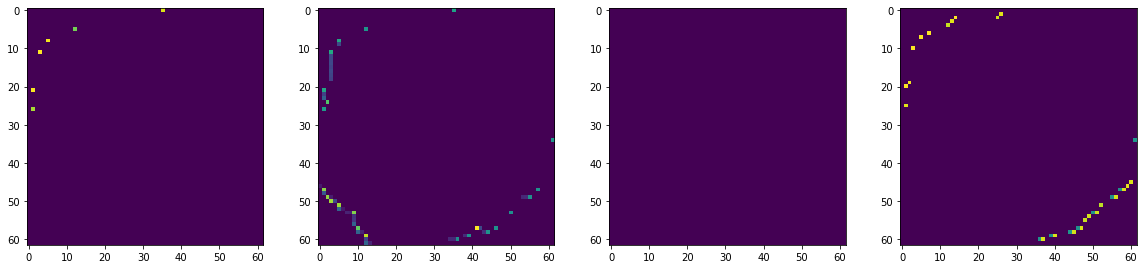

max_pooling2d


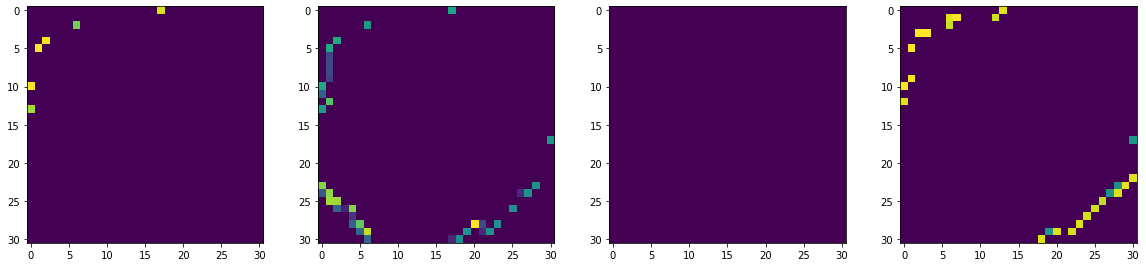

dropout


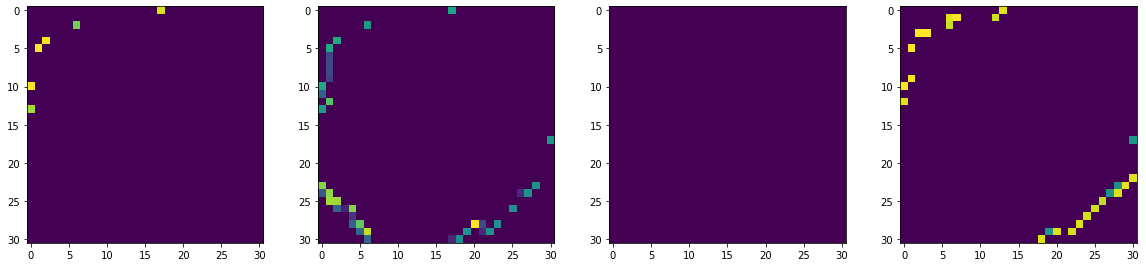

conv2d_1


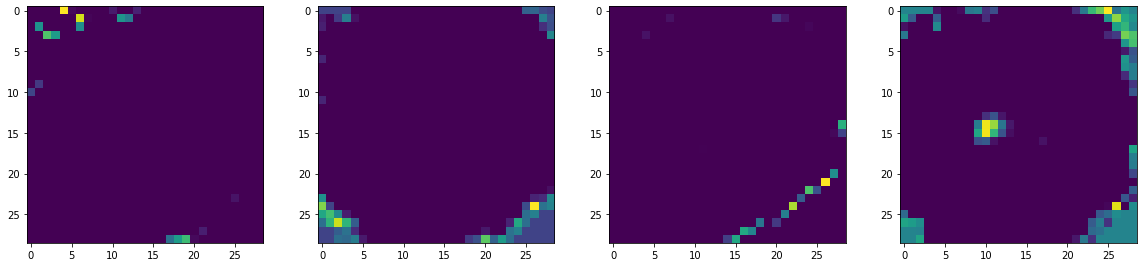

max_pooling2d_1


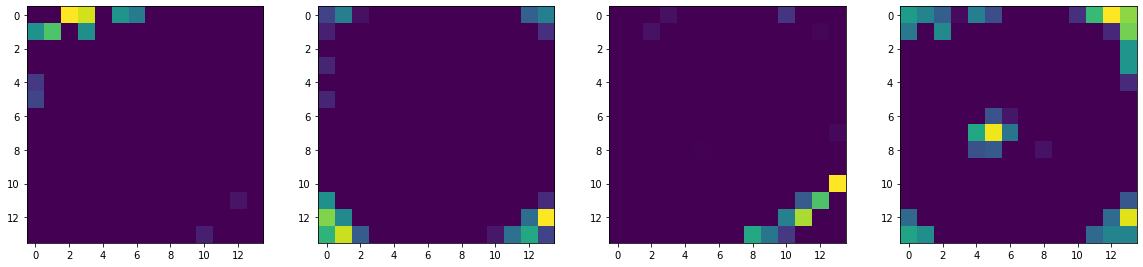

dropout_1


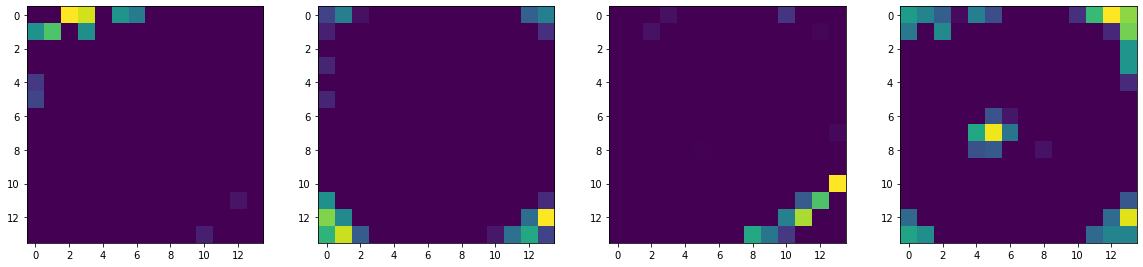

conv2d_2


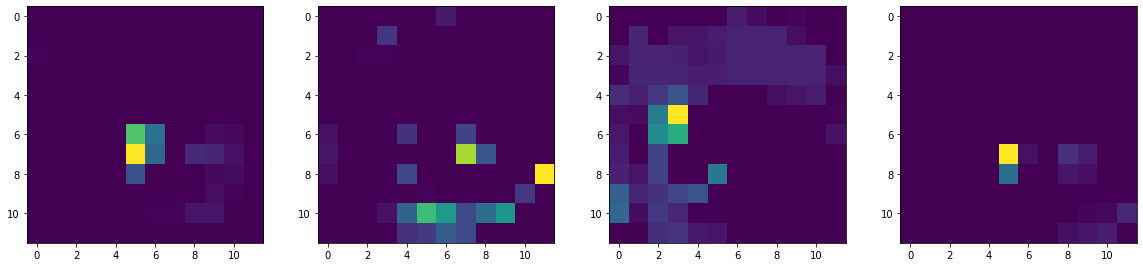

max_pooling2d_2


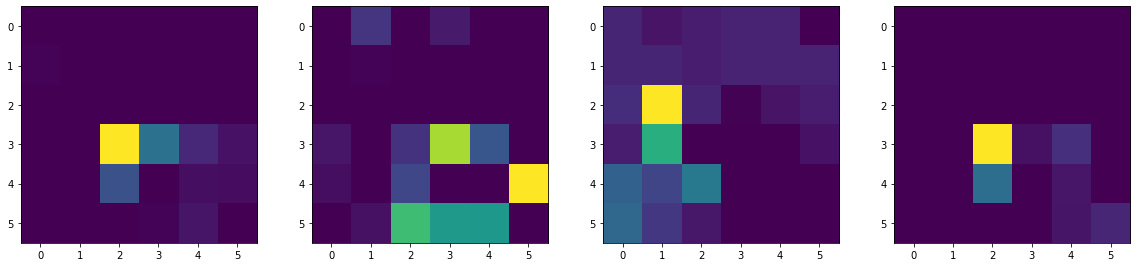

dropout_2


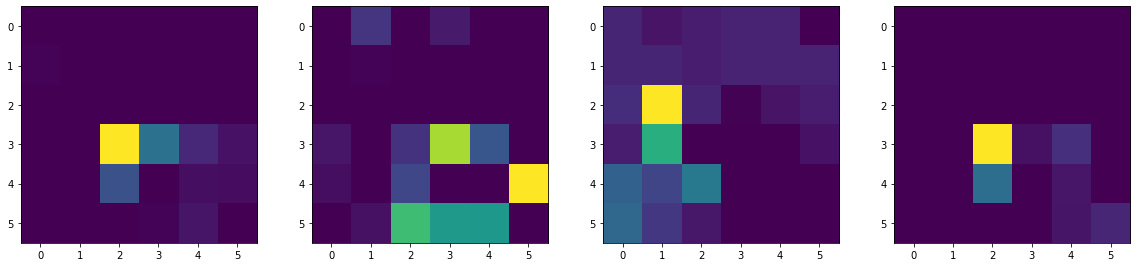

In [19]:
for j in range(0,9):
  activation_model = Model(inputs=model.inputs, outputs=model.layers[j].output)
  activation = activation_model(img_tensor)
  print(model.get_layer(index = j).name)
  plt.figure(figsize=(20,20))

  for i in range(4):
      plt.subplot(4,4,i+1)

      plt.imshow(activation[0,:,:,i])
  plt.show()

In [20]:
for j in range(9,13):
  activation_model = Model(inputs=model.inputs, outputs=model.layers[j].output)
  activation = activation_model(img_tensor)
  print(model.get_layer(index = j).name)
  plt.figure(figsize=(20,20))
  print(activation)

flatten
tf.Tensor([[0.         0.         0.03978471 ... 0.         0.         0.        ]], shape=(1, 1152), dtype=float32)
dense
tf.Tensor(
[[ 0.          0.          5.723478    7.4362264   5.4243255   0.
   0.          0.         10.318248    3.24964     7.630795    0.
   0.27007872  6.475677    2.1109786   0.84078467  7.786168    0.
   0.          0.          5.6335583   0.          0.          0.
   0.          3.5706108   0.          5.0341473   0.         10.021128
   0.          6.0859513   0.          1.9583632   3.1251147   0.
   0.          3.5569866   0.          4.3318286   0.         11.674558
   0.          7.5372205   4.7576637   8.960193    7.6992717  10.223603
   1.4506499   7.0359035   0.          8.891384    0.          0.
   5.530635    0.          0.          6.406276    0.          0.
   0.          3.3528817   0.          0.        ]], shape=(1, 64), dtype=float32)
dropout_3
tf.Tensor(
[[ 0.          0.          5.723478    7.4362264   5.4243255   0.
   0.     

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

1/1 [==============================] - 0s 94ms/step


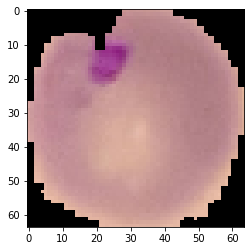

In [21]:
image_path="C:/Users/TUSHAR/Desktop/malaria/predict/C33P1thinF_IMG_20150619_121229a_cell_179.png"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
predictions = (model.predict(img) > 0.5).astype("int32")
plt.show()

conv2d


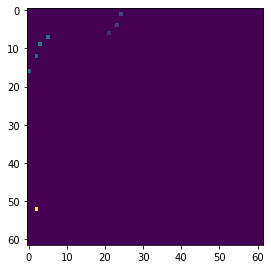

max_pooling2d


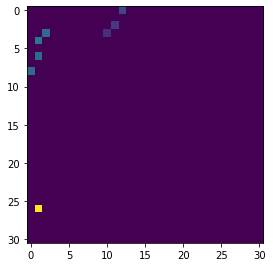

dropout


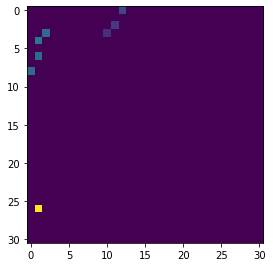

conv2d_1


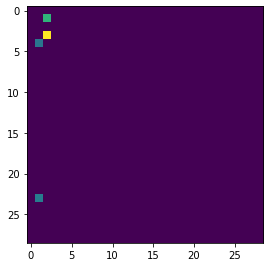

max_pooling2d_1


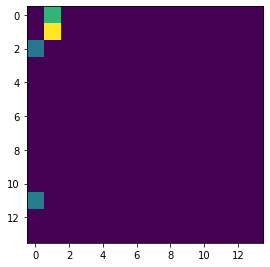

dropout_1


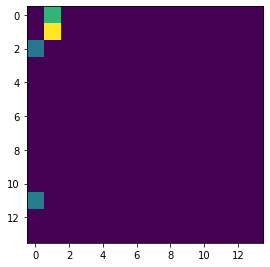

conv2d_2


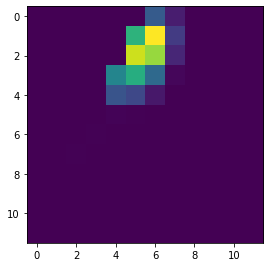

max_pooling2d_2


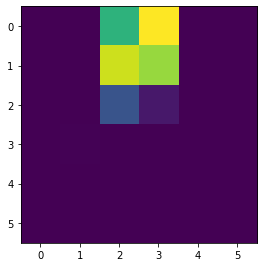

dropout_2


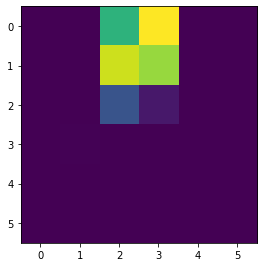

flatten
tf.Tensor([[0.         0.         0.04537423 ... 0.         0.         0.        ]], shape=(1, 1152), dtype=float32)
dense
tf.Tensor(
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 4.6107750e+00 1.3270787e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.4071612e+00
  7.7119560e+00 0.0000000e+00 1.5680475e+00 4.4225969e+00 0.0000000e+00
  3.5016537e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.2491565e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 5.8513718e+00 8.5477746e-01 3.9706302e+00
  0.0000000e+00 1.0756919e+00 0.0000000e+00 4.8604360e+00 4.4110441e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.1189926e+00
  0.0000000e+00 6.0318885e+00 3.5523937e+00 0.0000000e+00 0.0000000e+00
  1.4850281e+00 0.0000000e+00 0.0000000e+00 5.8238535e+00 6.1294746e+00
  3.9708033e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.1922452e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.000000

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [22]:
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# for j in range(0,1):
#   activation_model = Model(inputs=model.inputs, outputs=model.layers[6].output)
#   activation = activation_model(img_tensor)
#   print(model.get_layer(index = 6).name)
#   plt.figure(figsize=(20,20))
#   print(activation)
for j in range(0,9):
  activation_model = Model(inputs=model.inputs, outputs=model.layers[j].output)
  activation = activation_model(img_tensor)
  print(model.get_layer(index = j).name)
  plt.figure(figsize=(20,20))

  for i in range(1):
      plt.subplot(4,4,i+1)

      plt.imshow(activation[0,:,:,i])
  plt.show()
for j in range(9,13):
  activation_model = Model(inputs=model.inputs, outputs=model.layers[j].output)
  activation = activation_model(img_tensor)
  print(model.get_layer(index = j).name)
  plt.figure(figsize=(20,20))
  print(activation)
if(predictions[0]==1):
  print(" -------------Uninfected-------------")
else :
  print("-------------Parasitized-------------")